# CAP 394 - Introduction to Data Science
## Instituto Nacional de Pesquisas Espaciais INPE
Trabalho Final: Análise de Índices Espectrais e Métodos de Aprendizado de Máquina para Detecção de Áreas Queimadas
Alunos:
    - Fabiana Zioti
    - Gabriel Sansigolo
    - Rafael Mariano

### Informações sobre os Dados e Área de Estudo

Na primeira parte do trabalho foi realizado uma análise dos dados de queimadas. Os dados são  provenientes do Programa Queimadas do INPE. O Programa Queimadas é um projeto desenvolvido pelo Instituto Nacional de Pesquisas Espaciais (INPE) com o objetivo de monitorar o risco e o impacto do fogo. 

![Região de Estudo](images/area_estudo.png)

Para este trabalho, a região de estudo se focou na **orbita ponto 221_067** (segunda imagem acima) do satélite Landsat 8. Essa região é importante para os estudiosos, pois incluí a área do Jalapão que é seriamente ameaçada por queimadas florestais. O Jalapão possuí a maior área de conservação ambiental do Bioma Cerrado, protegida pelo Ministério do Meio Ambiente do Brasil através do Projeto Cerrado-Jalapão.

Vamos trabalhar com um arquivo shapefile que contém informações sobre as bandas dos satélites, índices espectrais, e um campo nomeado como verifica, que indica as áreas confirmadas como queimadas e áreas duvidosas.

### Obtendo os Dados

Realiza os import das bibliotecas necessária para manipular o dataframe que será gerado através da obtenção dos dados no shapefile (pandas e geopandas) e realizar o plot dos gráficos (matplotlib e seaborn). 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

Realiza a leitura do arquivo shapefile e atribui os dados do Programa Queimadas na variável `queimadas`, já como um objeto **dataframe**.

In [2]:
queimadas = gpd.read_file("DS/221_067_2017.shp")

A seguir é apresentado uma amostra dos dados.

In [4]:
queimadas.head()

,id,cod_sat,cena_id,nome_arq,orb_pto,area_ha,perim,n_arq_ant,ndvi,nbrl,...,medianb4,medianb5,medianb6,medianb7,verifica,proc_id,focos,data_atual,data_anter,geometry
0,23946449,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,12.968645,2639,LC82210672017109LGN00.tar.bz,0.211523,-0.044128,...,0.144337,0.227026,0.304834,0.245830,1,5886,2,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.9715795250224 -10.3363584942161,..."
1,23946450,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.263320,600,LC82210672017109LGN00.tar.bz,0.042114,-0.027508,...,0.040925,0.044027,0.049672,0.046862,1,5886,0,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.358025045795 -10.3373571795547, ..."
2,23946451,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,7.568930,2340,LC82210672017109LGN00.tar.bz,0.306289,-0.003284,...,0.083032,0.151609,0.205350,0.169358,1,5886,1,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.9860921817999 -10.3359982294198,..."
3,23946452,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.804195,660,LC82210672017109LGN00.tar.bz,0.256839,-0.017937,...,0.143473,0.242181,0.360290,0.251297,0,5886,0,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.0128759745859 -10.3521908768478,..."
4,23946453,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,2.886433,1140,LC82210672017109LGN00.tar.bz,0.240240,0.000871,...,0.116126,0.195281,0.244584,0.189877,1,5886,2,2017-05-05,2017-04-19 00:00:00,"POLYGON ((-46.3574643464459 -10.3343756813685,..."


In [5]:
queimadas.dtypes

id              int64
cod_sat         int64
cena_id        object
nome_arq       object
orb_pto        object
area_ha       float64
perim           int64
n_arq_ant      object
ndvi          float64
nbrl          float64
dif_ndvi      float64
dif_dnbrl     float64
medianb1       object
medianb2      float64
medianb3      float64
medianb4      float64
medianb5      float64
medianb6      float64
medianb7      float64
verifica        int64
proc_id         int64
focos           int64
data_atual     object
data_anter     object
geometry       object
dtype: object

### Análises dos Dados

Uma informação interessante que gostaríamos de tirar desses dados é:
- Qual a distribuição de queimdas e focos ao longo dos meses do ano de 2017?

Para extrair essa informação, primeiro é necessário alterar a coluna `data_atual` e `data_anter` para um objeto **date**. O objetivo é facilitar a manipulação das datas.

In [3]:
queimadas["data_atual"] = pd.to_datetime(queimadas["data_atual"])
queimadas["data_anter"] = pd.to_datetime(queimadas["data_anter"])

In [7]:
queimadas.dtypes

id                     int64
cod_sat                int64
cena_id               object
nome_arq              object
orb_pto               object
area_ha              float64
perim                  int64
n_arq_ant             object
ndvi                 float64
nbrl                 float64
dif_ndvi             float64
dif_dnbrl            float64
medianb1              object
medianb2             float64
medianb3             float64
medianb4             float64
medianb5             float64
medianb6             float64
medianb7             float64
verifica               int64
proc_id                int64
focos                  int64
data_atual    datetime64[ns]
data_anter    datetime64[ns]
geometry              object
dtype: object

Agora é possível visualizar a distribuição de queimadas ao longo dos meses.

In [4]:
queimadas_mes = queimadas.groupby(queimadas.data_atual.dt.month).id.count()

In [9]:
queimadas_mes

data_atual
5     3617
6     2299
7     2022
8     1677
9     2086
10    3969
Name: id, dtype: int64

In [5]:
novo_indice = map(lambda v : calendar.month_abbr[v], queimadas_mes.index)

l = list(novo_indice)

queimadas_mes = pd.Series(data=queimadas_mes.values, index=l)

queimadas_mes.name= "Número Queimadas/Mês"

queimadas_mes.index.name="Mês"

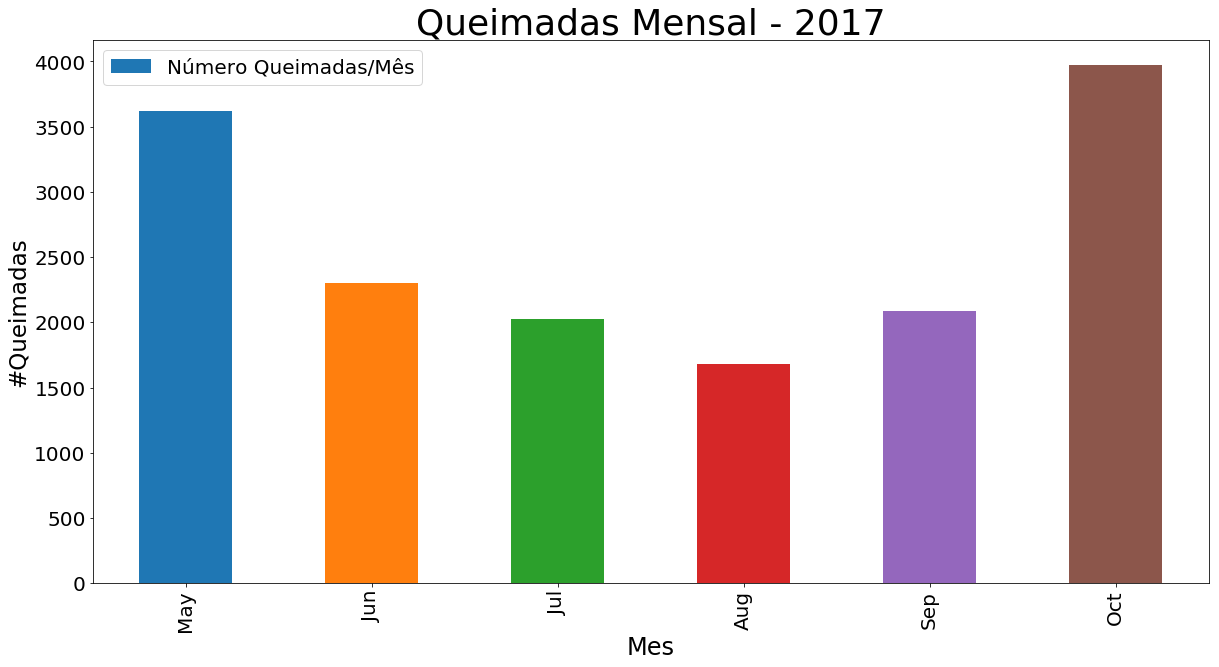

In [6]:
ax  = queimadas_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Queimadas Mensal - 2017", fontsize=36);
ax.set_xlabel("Mes", fontsize=24);
ax.set_ylabel("#Queimadas", fontsize=23);
ax.legend(loc=2, prop={'size': 20});

Realizamos a separação dos dados em com base no atributo `verifica`. O `verifica` é uma coluna do tipo binária que recebe 1 para regiões validadas como queimadas e 0 para regiões duvidosas.

In [7]:
queimadas_validadas = queimadas[queimadas.verifica == 1]
queimadas_nvalidadas = queimadas[queimadas.verifica == 0]

Visualizando áreas queimadas:

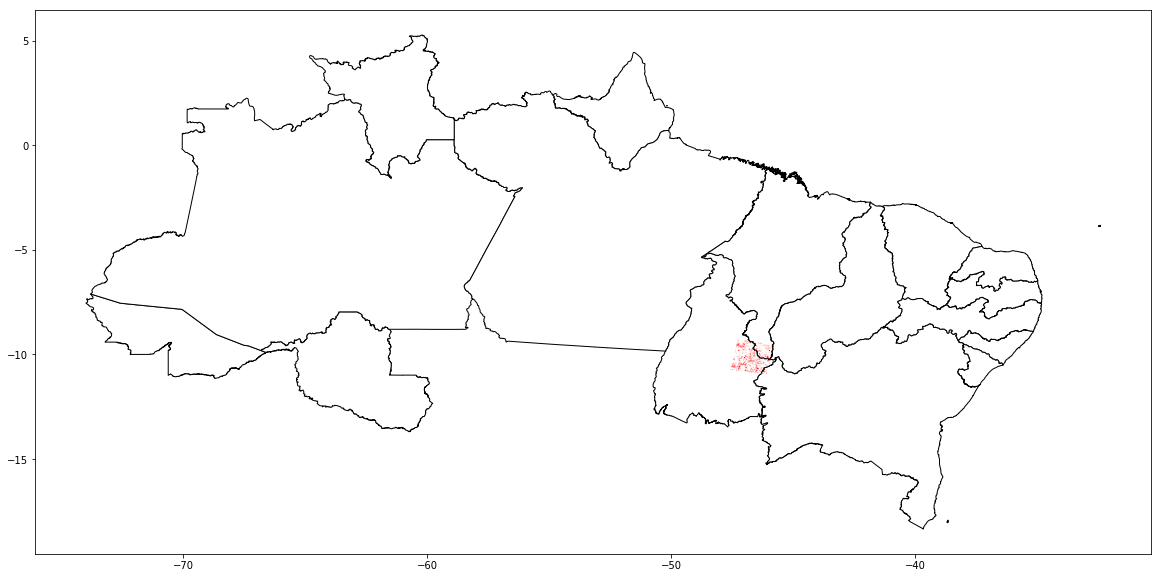

In [52]:
uf = gpd.read_file("br_unidades_da_federacao/BRUFE250GC_SIR.shp")

uf = uf.to_crs({'init': 'epsg:4326'})

uf = uf[(uf.NM_REGIAO == 'NORTE') | (uf.NM_REGIAO == 'NORDESTE') ]

fig, ax = plt.subplots(figsize=(20, 10))
uf.plot(ax=ax, color='white', edgecolor='black')
queimadas_validadas.plot(ax=ax, color='red', markersize=5)
plt.show()


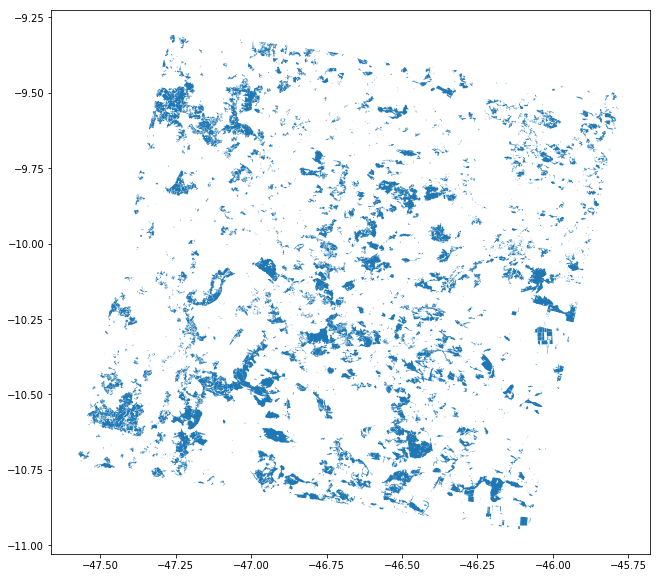

In [9]:
queimadas_validadas.plot(markersize=5, figsize=(20, 10) )

Visualizando áreas duvidosas

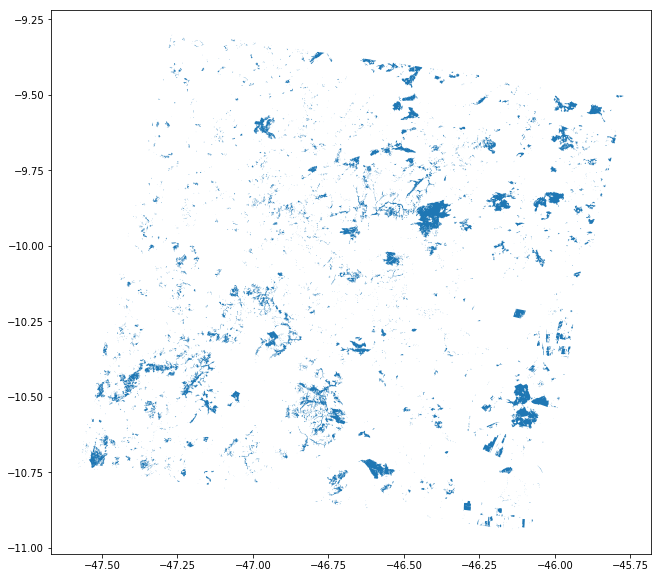

In [14]:
queimadas_nvalidadas.plot(markersize=5, figsize=(20, 10) )

A seguir é apresentado a distribuição das queimadas ao longo dos meses. Foi realizado o agrupamento dos dados por mês. Também separou os dados com base no atributo `verifica` para realizar uma melhor visualização de áreas queimadas e de áreas duvidosas.

In [15]:
queimadas_validadas_mes = queimadas_validadas.groupby(queimadas.data_atual.dt.month).id.count()
queimadas_nvalidadas_mes = queimadas_nvalidadas.groupby(queimadas.data_atual.dt.month).id.count()

In [16]:
queimadas_validadas_mes = pd.Series(data=queimadas_validadas_mes.values, index=l)

queimadas_validadas_mes.name= "Número Queimadas/Mês"

queimadas_validadas_mes.index.name="Mês"

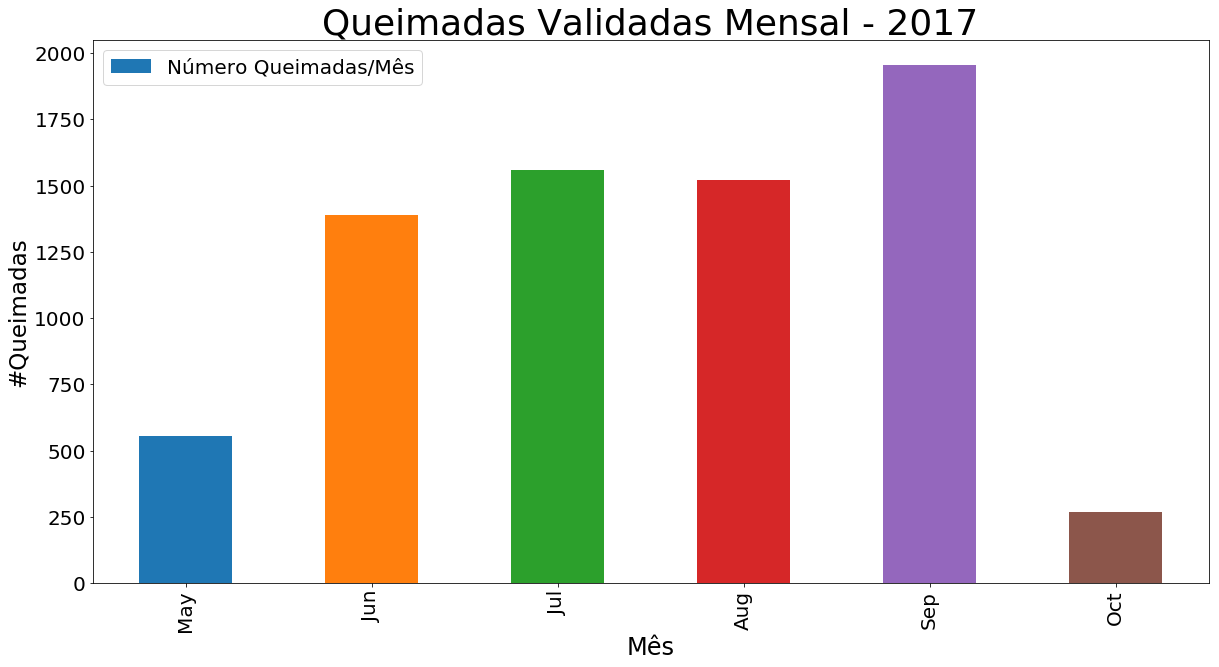

In [17]:
ax  = queimadas_validadas_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Queimadas Validadas Mensal - 2017", fontsize=36);
ax.set_xlabel("Mês", fontsize=24);
ax.set_ylabel("#Queimadas", fontsize=23);
ax.legend(loc=2, prop={'size': 20});

In [18]:
queimadas_nvalidadas_mes = pd.Series(data=queimadas_nvalidadas_mes.values, index=l)
queimadas_nvalidadas_mes.name= "Número Queimadas/Mês"
queimadas_nvalidadas_mes.index.name="Mês"

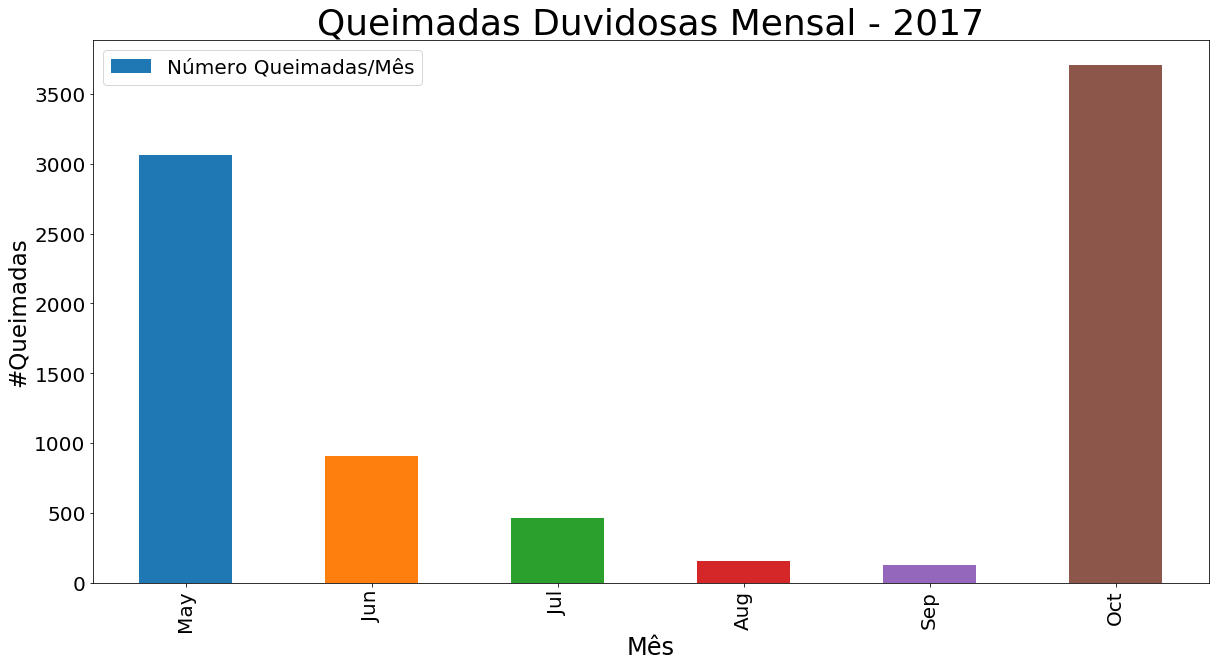

In [19]:
ax  = queimadas_nvalidadas_mes.plot(kind="bar", legend=True, fontsize=20, figsize=(20,10));
ax.set_title("Queimadas Duvidosas Mensal - 2017", fontsize=36);
ax.set_xlabel("Mês", fontsize=24);
ax.set_ylabel("#Queimadas", fontsize=23);
ax.legend(loc=2, prop={'size': 20});

Uma hipótese formulada com base na interpretação dos gráficos de distribuição ao logo dos meses é que os meses de Maio e Outubro apresentaram um pico maior de números de áreas tidas como falsas ou duvidosas devido ao período de agricultura, ou a fatores de clima/estação do ano. Porém esta questão ainda deve ser analisado com mais cautela e não situa-se no escopo deste projeto.

### Índices Espectrais

Índices espectrais são a combinação da refletância espectral de dois ou mais comprimentos de onda para destacar uma característica relativa de interesse, como vegetação, características artificiais, hídricas e geológicas. Essas combinações têm a vantagem de permitir uma comparação quantitativa.

Em concordância com o trabalho de [Pereira et al. 2016](https://www.researchgate.net/profile/Allan_Pereira2/publication/315694452_Evaluation_of_Spectral_Indices_for_Burned_Area_Identification_in_Cerrado_using_Landsat_TM_Data/links/58dc2459a6fdcc7c9f2b7ed3/Evaluation-of-Spectral-Indices-for-Burned-Area-Identification-in-Cerrado-using-Landsat-TM-Data.pdf), também adicionamos os índices: MIRBI, NBR, NBR2, BAI, NDWI e BAIM, calculados utilizando os valores de medianas das bandas.

In [20]:
queimadas['mirb'] = (10 * queimadas['medianb7']) - (9.8 * queimadas['medianb6'] + 2)
queimadas['nbr'] = (queimadas['medianb5'] - queimadas['medianb7']) / (queimadas['medianb5'] + queimadas['medianb7'])
queimadas['nbr2'] = (queimadas['medianb6'] - queimadas['medianb7']) / (queimadas['medianb6'] + queimadas['medianb7'])
queimadas['bai'] = 1 / ((( queimadas['medianb5'] - 0.06) ** 2) + ((queimadas['medianb4'] - 0.1) ** 2))
queimadas['baim'] = 1 /((( queimadas['medianb5'] - 0.05 ) ** 2) + ((queimadas['medianb6'] - 0.2 ) ** 2))
queimadas['ndwi'] = ( queimadas['medianb5'] - queimadas['medianb6'] ) / (queimadas['medianb5'] + queimadas['medianb6'])

In [21]:
queimadas.head()

,id,cod_sat,cena_id,nome_arq,orb_pto,area_ha,perim,n_arq_ant,ndvi,nbrl,...,focos,data_atual,data_anter,geometry,mirb,nbr,nbr2,bai,baim,ndwi
0,23946449,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,12.968645,2639,LC82210672017109LGN00.tar.bz,0.211523,-0.044128,...,2,2017-05-05,2017-04-19,"POLYGON ((-46.9715795250224 -10.3363584942161,...",-2.529071,-0.039766,0.107150,33.485539,23.624772,-0.146292
1,23946450,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.263320,600,LC82210672017109LGN00.tar.bz,0.042114,-0.027508,...,0,2017-05-05,2017-04-19,"POLYGON ((-46.358025045795 -10.3373571795547, ...",-2.018163,-0.031193,0.029106,267.023785,44.180948,-0.060244
2,23946451,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,7.568930,2340,LC82210672017109LGN00.tar.bz,0.306289,-0.003284,...,1,2017-05-05,2017-04-19,"POLYGON ((-46.9860921817999 -10.3359982294198,...",-2.318851,-0.055296,0.096054,115.204774,96.589363,-0.150550
3,23946452,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,1.804195,660,LC82210672017109LGN00.tar.bz,0.256839,-0.017937,...,0,2017-05-05,2017-04-19,"POLYGON ((-46.0128759745859 -10.3521908768478,...",-3.017878,-0.018472,0.178214,28.506415,15.967674,-0.196041
4,23946453,8,LC82210672017125LGN00,LC82210672017125LGN00.tar.gz,221_067,2.886433,1140,LC82210672017109LGN00.tar.bz,0.240240,0.000871,...,2,2017-05-05,2017-04-19,"POLYGON ((-46.3574643464459 -10.3343756813685,...",-2.498149,0.014029,0.125918,53.876698,43.300922,-0.112087


Criamos um novo dataframe apenas com os indices espectrais.

In [22]:
df_indices_espectrais = queimadas[['ndvi','nbrl','mirb','nbr','nbr2','bai','baim','ndwi','dif_ndvi','dif_dnbrl', 'verifica']]

In [23]:
df_indices_espectrais.head()

,ndvi,nbrl,mirb,nbr,nbr2,bai,baim,ndwi,dif_ndvi,dif_dnbrl,verifica
0,0.211523,-0.044128,-2.529071,-0.039766,0.107150,33.485539,23.624772,-0.146292,0.144335,0.330056,1
1,0.042114,-0.027508,-2.018163,-0.031193,0.029106,267.023785,44.180948,-0.060244,0.216542,0.298818,1
2,0.306289,-0.003284,-2.318851,-0.055296,0.096054,115.204774,96.589363,-0.150550,0.208789,0.398846,1
3,0.256839,-0.017937,-3.017878,-0.018472,0.178214,28.506415,15.967674,-0.196041,0.101308,0.234384,0
4,0.240240,0.000871,-2.498149,0.014029,0.125918,53.876698,43.300922,-0.112087,0.108049,0.399252,1


Utilizamos a ferramenta de visualização Boxplot para analisar a discrepância de valor entre os índices espectrais agrupando com base no atributo `verifica`.

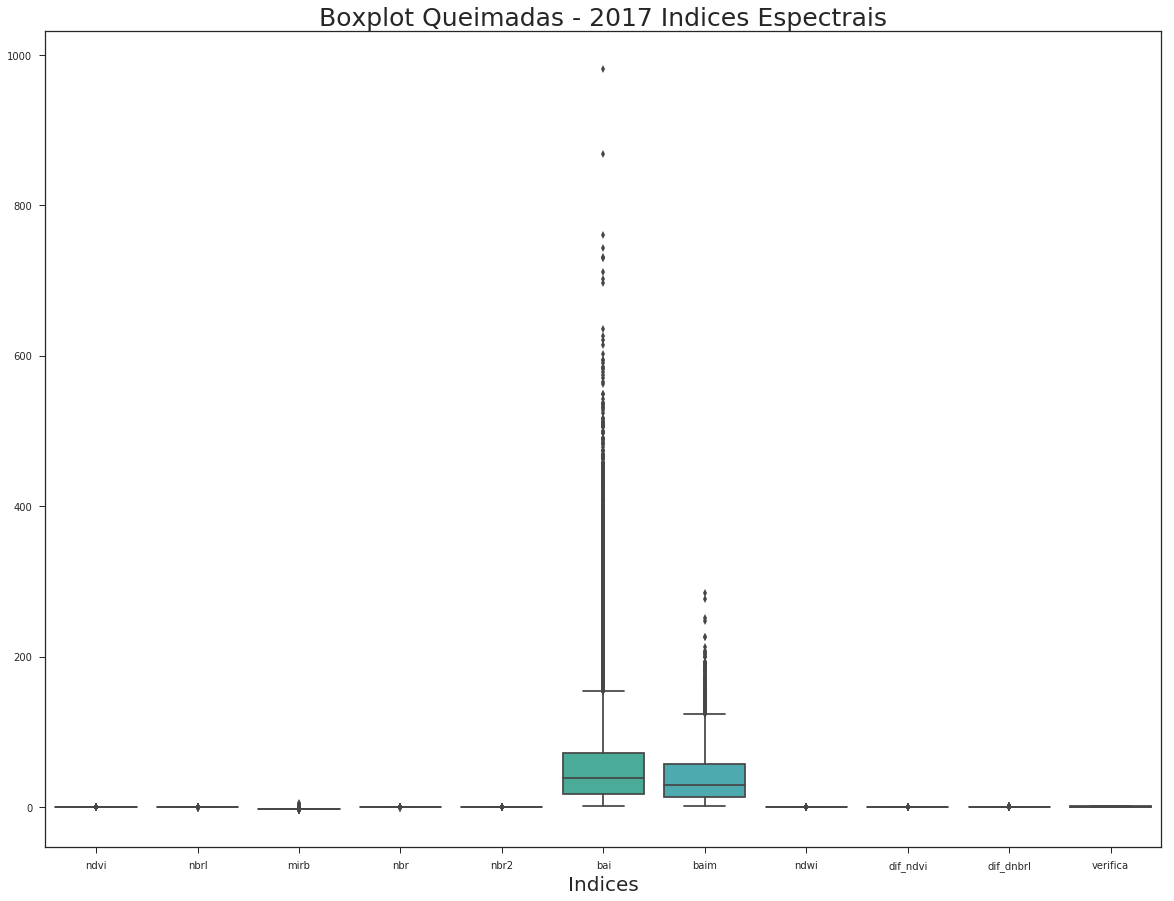

In [24]:
sns.set(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize=(20,15))
ax.set_title("Boxplot Queimadas - 2017 Indices Espectrais", fontsize=25)
plt.xlabel("Indices", fontsize=20)
sns.boxplot(data=df_indices_espectrais)

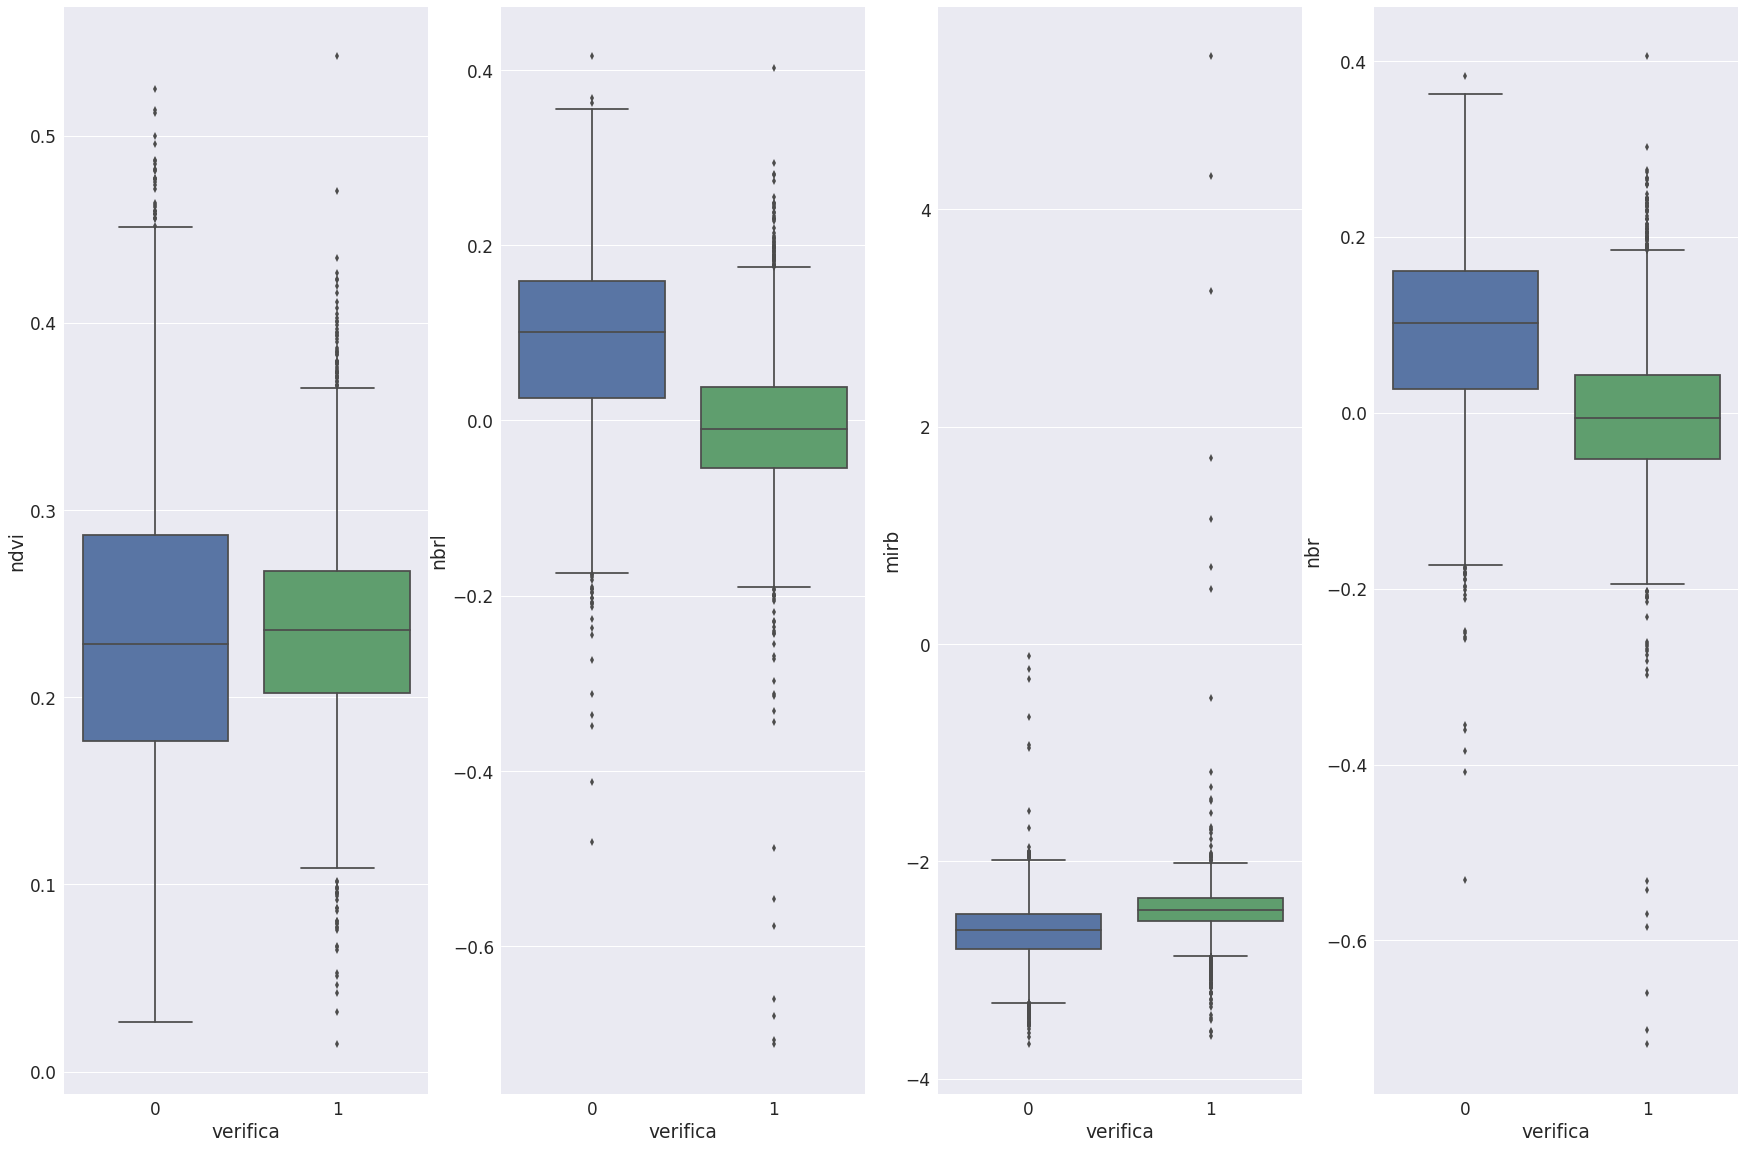

In [25]:
sns.set(style="ticks", palette="pastel")
sns.set(font_scale=1.7)
fig, axs = plt.subplots(ncols=4, figsize=(30,20))
sns.boxplot(x = 'verifica', y = 'ndvi', data=df_indices_espectrais, ax = axs[0])
sns.boxplot(x = 'verifica', y = 'nbrl', data=df_indices_espectrais, ax = axs[1])
sns.boxplot(x = 'verifica', y = 'mirb', data=df_indices_espectrais, ax = axs[2])
sns.boxplot(x = 'verifica', y = 'nbr', data=df_indices_espectrais, ax = axs[3])

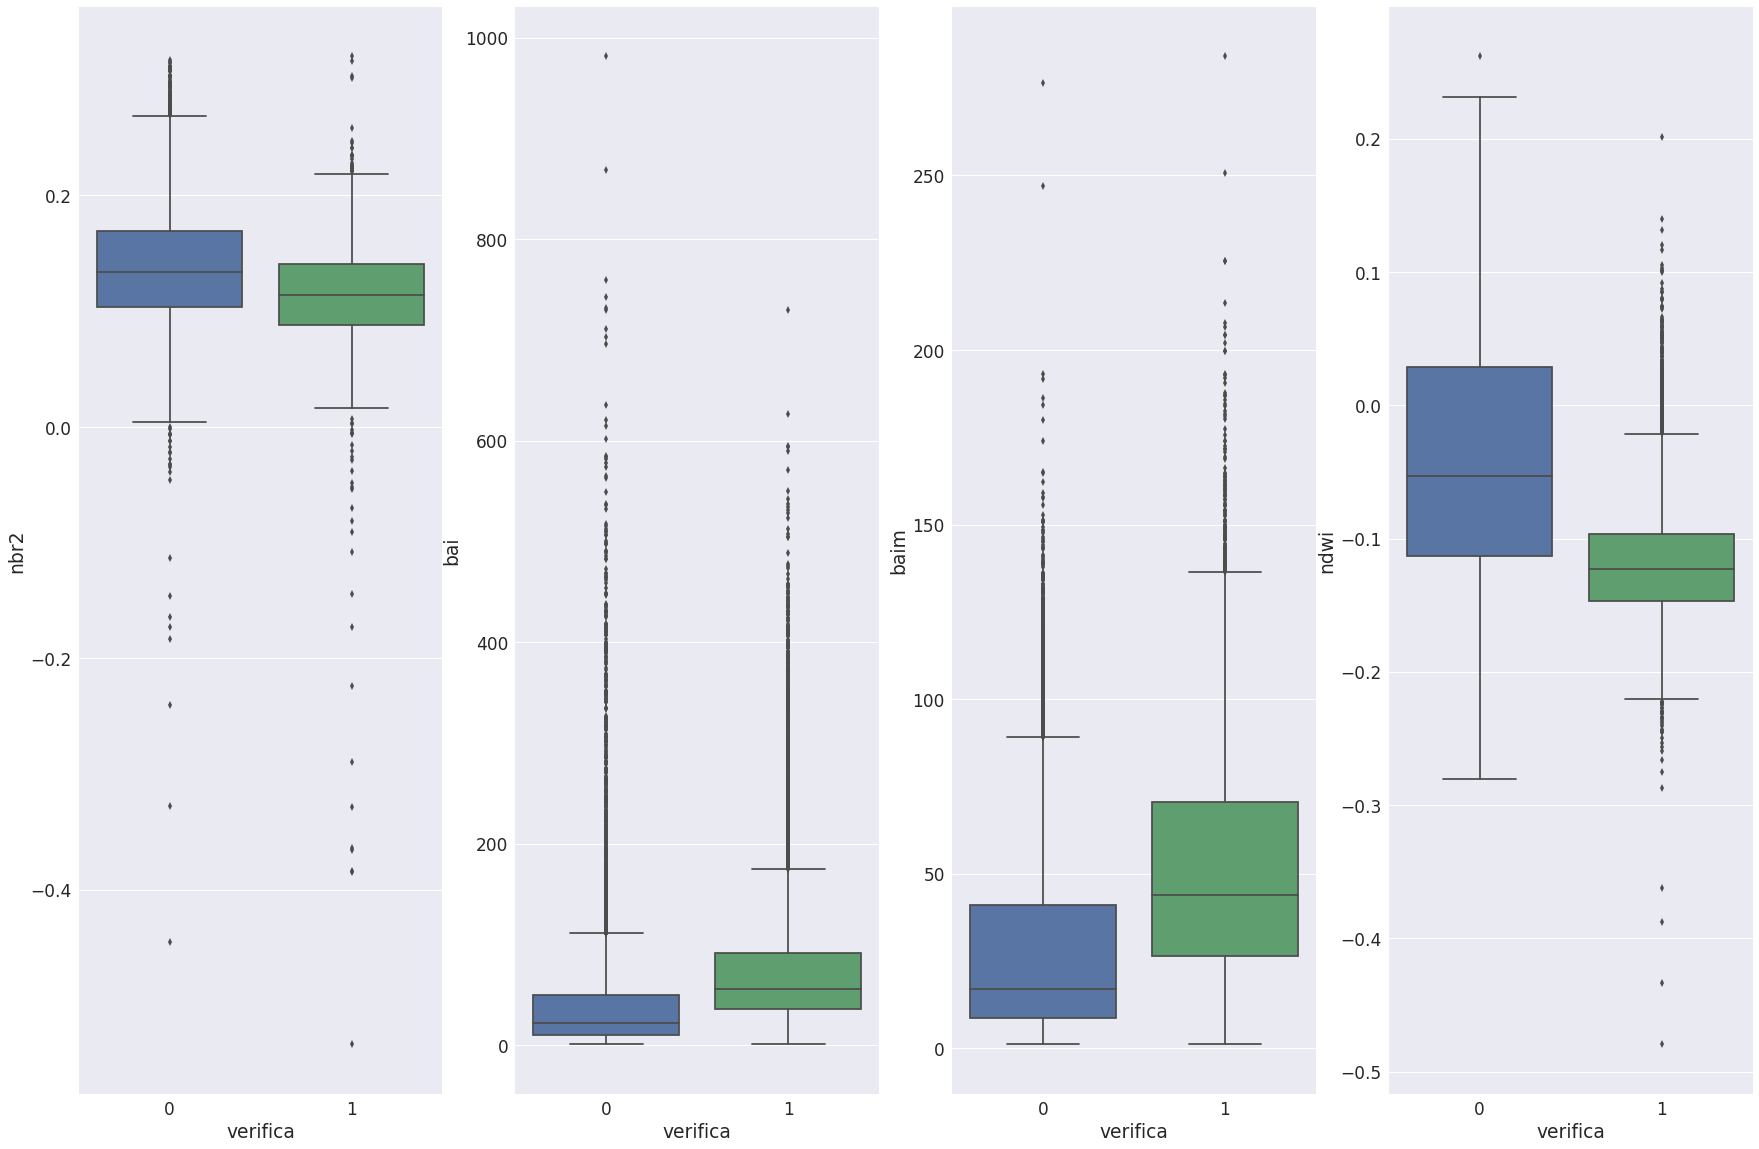

In [26]:
sns.set(style="ticks", palette="pastel")
sns.set(font_scale=1.7)
fig, axs = plt.subplots(ncols=4, figsize=(30,20))
sns.boxplot(x = 'verifica', y = 'nbr2', data=df_indices_espectrais, ax = axs[0])
sns.boxplot(x = 'verifica', y = 'bai', data=df_indices_espectrais, ax = axs[1])
sns.boxplot(x = 'verifica', y = 'baim', data=df_indices_espectrais, ax = axs[2])
sns.boxplot(x = 'verifica', y = 'ndwi', data=df_indices_espectrais, ax = axs[3])

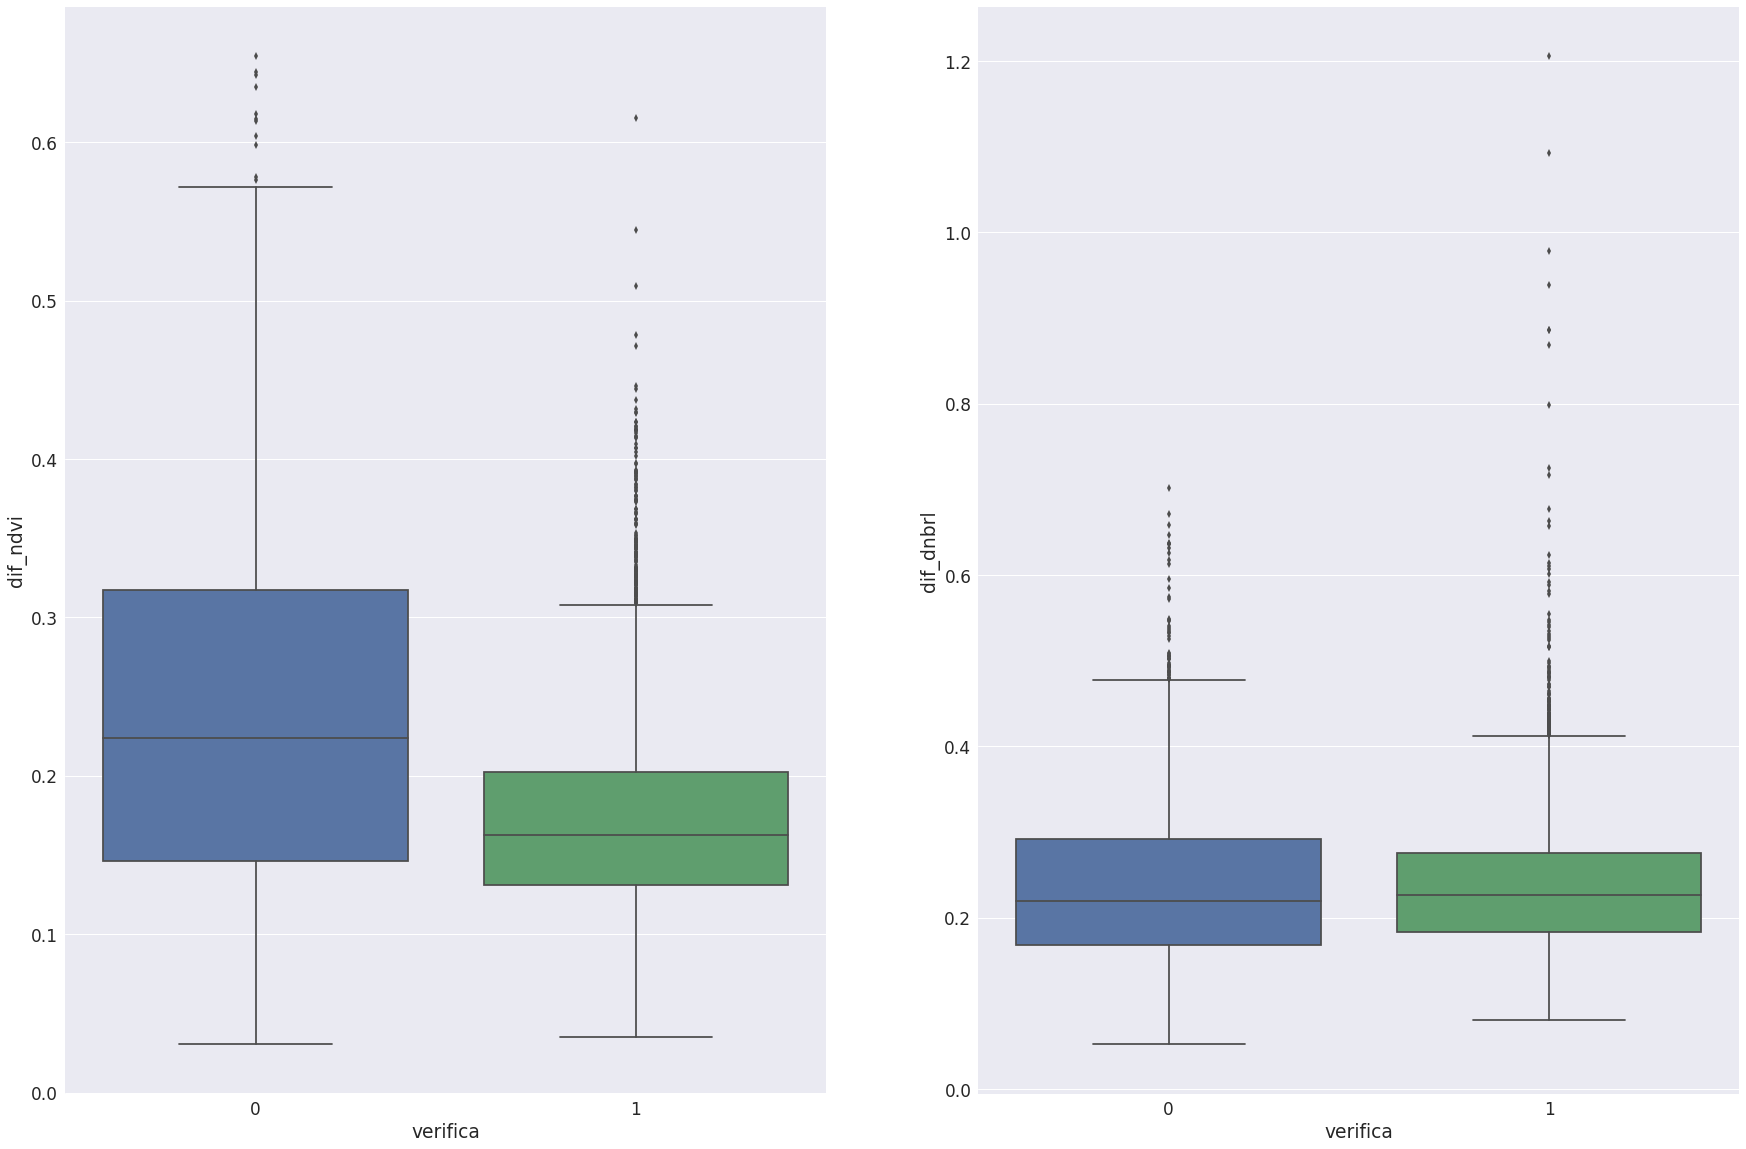

In [27]:
sns.set(style="ticks", palette="pastel")
sns.set(font_scale=1.7)
fig, axs = plt.subplots(ncols=2, figsize=(30,20))
sns.boxplot(x = 'verifica', y = 'dif_ndvi', data=df_indices_espectrais, ax = axs[0])
sns.boxplot(x = 'verifica', y = 'dif_dnbrl', data=df_indices_espectrais, ax = axs[1])

Com base nas informações extraídas dos gráficos do boxplot, constatamos que os índices NBRL, NBR, BAI e NDWI apresentaram uma disparidade entre áreas validadas como queimadas e áreas tidas como duvidosas. A diferença do NDVI, e as medianas 2, 3, também apresentaram boa separabilidade.

### Histograma dos Índices Espectrais

A seguir apresentamos o histograma dos índices que apresentaram uma maior separabilidade de classes.

In [32]:
df_indices_espectrais_validadas = df_indices_espectrais[df_indices_espectrais.verifica == 1]
df_indices_espectrais_nvalidadas = df_indices_espectrais[df_indices_espectrais.verifica == 0]

/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


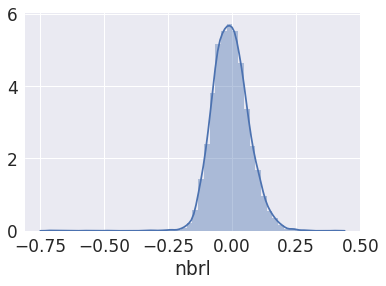

In [33]:
sns.distplot(df_indices_espectrais_validadas['nbrl'])

/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


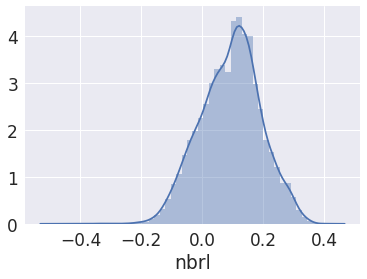

In [35]:
sns.distplot(df_indices_espectrais_nvalidadas['nbrl'])

A esquerda estão as queimadas validadas e a direita as queimadas duvidosas.

/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, 

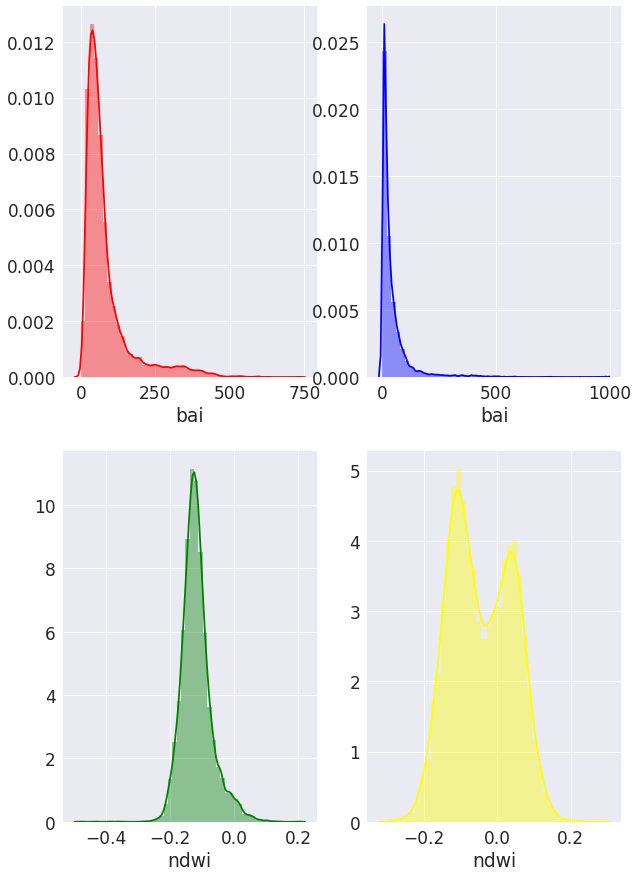

In [36]:
f, axis = plt.subplots(2,2, figsize=(10,15) )
sns.distplot(df_indices_espectrais_validadas['bai'], color = 'red', ax = axis[0,0])
sns.distplot(df_indices_espectrais_nvalidadas['bai'], color = 'blue', ax = axis[0,1])
sns.distplot(df_indices_espectrais_validadas['ndwi'], color = 'green', ax = axis[1,0])
sns.distplot(df_indices_espectrais_nvalidadas['ndwi'], color = 'yellow', ax = axis[1,1])
plt.legend()


/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/fabiana/Documents/Programas/anaconda3/envs/geospatial/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, 

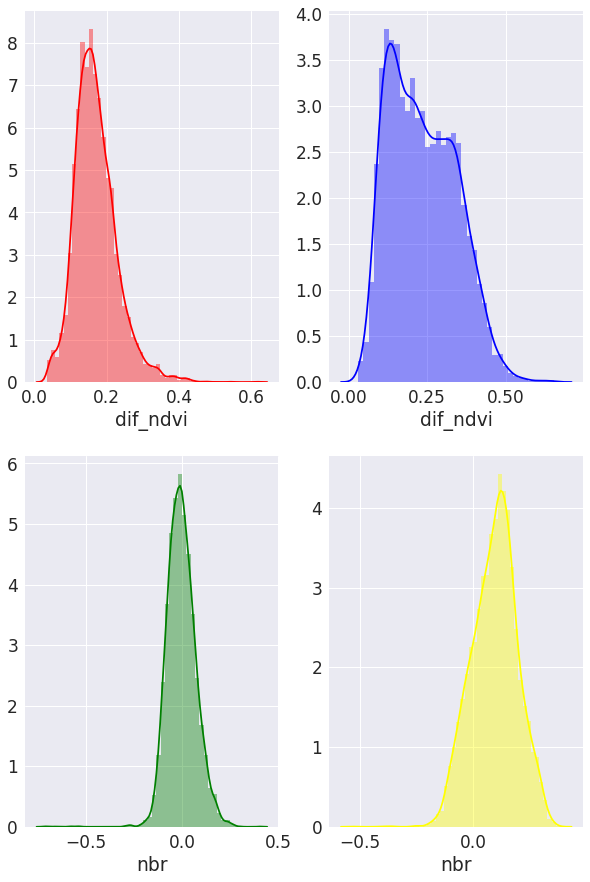

In [37]:
f, axis = plt.subplots(2,2, figsize=(10,15) )
sns.distplot(df_indices_espectrais_validadas['dif_ndvi'], color = 'red', ax = axis[0,0])
sns.distplot(df_indices_espectrais_nvalidadas['dif_ndvi'], color = 'blue', ax = axis[0,1])
sns.distplot(df_indices_espectrais_validadas['nbr'], color = 'green', ax = axis[1,0])
sns.distplot(df_indices_espectrais_nvalidadas['nbr'], color = 'yellow', ax = axis[1,1])
plt.legend()

### Conclusões